In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-06-06 10:56.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [3]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [4]:
import scanpy.external as sce

# Integrated data

In [5]:
# all are epithelial cell datasets
# file names are incorrect

adata_A = sc.read('Group_A_epithelial_immune.h5ad')
adata_B = sc.read('Group_B_epithelial_immune.h5ad')
adata_C = sc.read('Group_C_epithelial_immune.h5ad')

In [6]:
adata= adata_A.concatenate(adata_B, adata_C)

In [8]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T_1': ['P010','P008','P021','P049','P020','P062','P032','P016','P061','P012',
                     'P057','P015','P065','P063','P130','P056', 'P011','P127','P126','P001',
                     'P028','P027','P030'],
             'T_2': ['P037','P031','P026','P042','P019','P017','P036','P054','P023','P128',
                     'P048','P002','P104','P087','P094','P084','P079','P107','P076','P089',
                     'P083'],
                     
                   
             'T_3': [ 'P986','P658','P836','P866','P846','P686','P865','P585','P944','P787'],
             'T_4': ['P052','P024','P040','P039','P080','P075','P091','P009B','P082','P022',
                     'P074','P047','P038','P044','P009A']
              }

# Initialize empty column in cell metadata
adata.obs['T_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'T_patient_cluster4'] = i


In [9]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Myeloid_1': ['P063','P056','P009B','P075','P011','P032','P016','P104','P087','P089','P036','P083','P052',
                          'P047','P037','P091','P022','P074','P038','P082'],
            'Myeloid_2':  ['P130','P010','P986','P865','P585','P866','P846','P686','P658','P944','P836','P787'],
             'Myeloid_3': ['P040','P024','P017','P031','P026','P023','P049','P021','P107','P076','P079','P048','P062',
                          'P027','P065','P057','P008','P044','P001','P042','P094','P084','P080','P002','P061','P015'],
             'Myeloid_4': ['P128','P054','P019','P127','P126','P030','P028','P039','P020','P012']
              }

# Initialize empty column in cell metadata
adata.obs['Myeloid_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'Myeloid_patient_cluster4'] = i


In [10]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",],
             'M2toT1': ["P010",	"P130",],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",],
             'M4toT2': ["P019",	"P054",	"P128",],
             'M4toT3': [],
             'M4toT4': ["P039",],
             'NoMtoT4': ["P009A",]
            }

# Initialize empty column in cell metadata
adata.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'Myeloid_to_T_cluster44'] = i


In [11]:
adata.obs['crude']

AAACCTGAGCTAAACA-1-0-0-0-0-0    Fibroblast
AAACCTGAGCTGCAAG-1-0-0-0-0-0         Tumor
AAACCTGAGTACGTAA-1-0-0-0-0-0    Fibroblast
AAACCTGCACTGAAGG-1-0-0-0-0-0         Tumor
AAACCTGGTGCACCAC-1-0-0-0-0-0         Tumor
                                   ...    
TTTGGTTGTTGGTGGA-1-23-1-1-2         B cell
TTTGGTTTCACCTTAT-1-23-1-1-2         T cell
TTTGGTTTCGCCGTGA-1-23-1-1-2         T cell
TTTGGTTTCTCGCATC-1-23-1-1-2         T cell
TTTGTCAAGTGTGAAT-1-23-1-1-2         B cell
Name: crude, Length: 316153, dtype: category
Categories (8, object): ['B cell', 'Fibroblast', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell', 'Tumor']

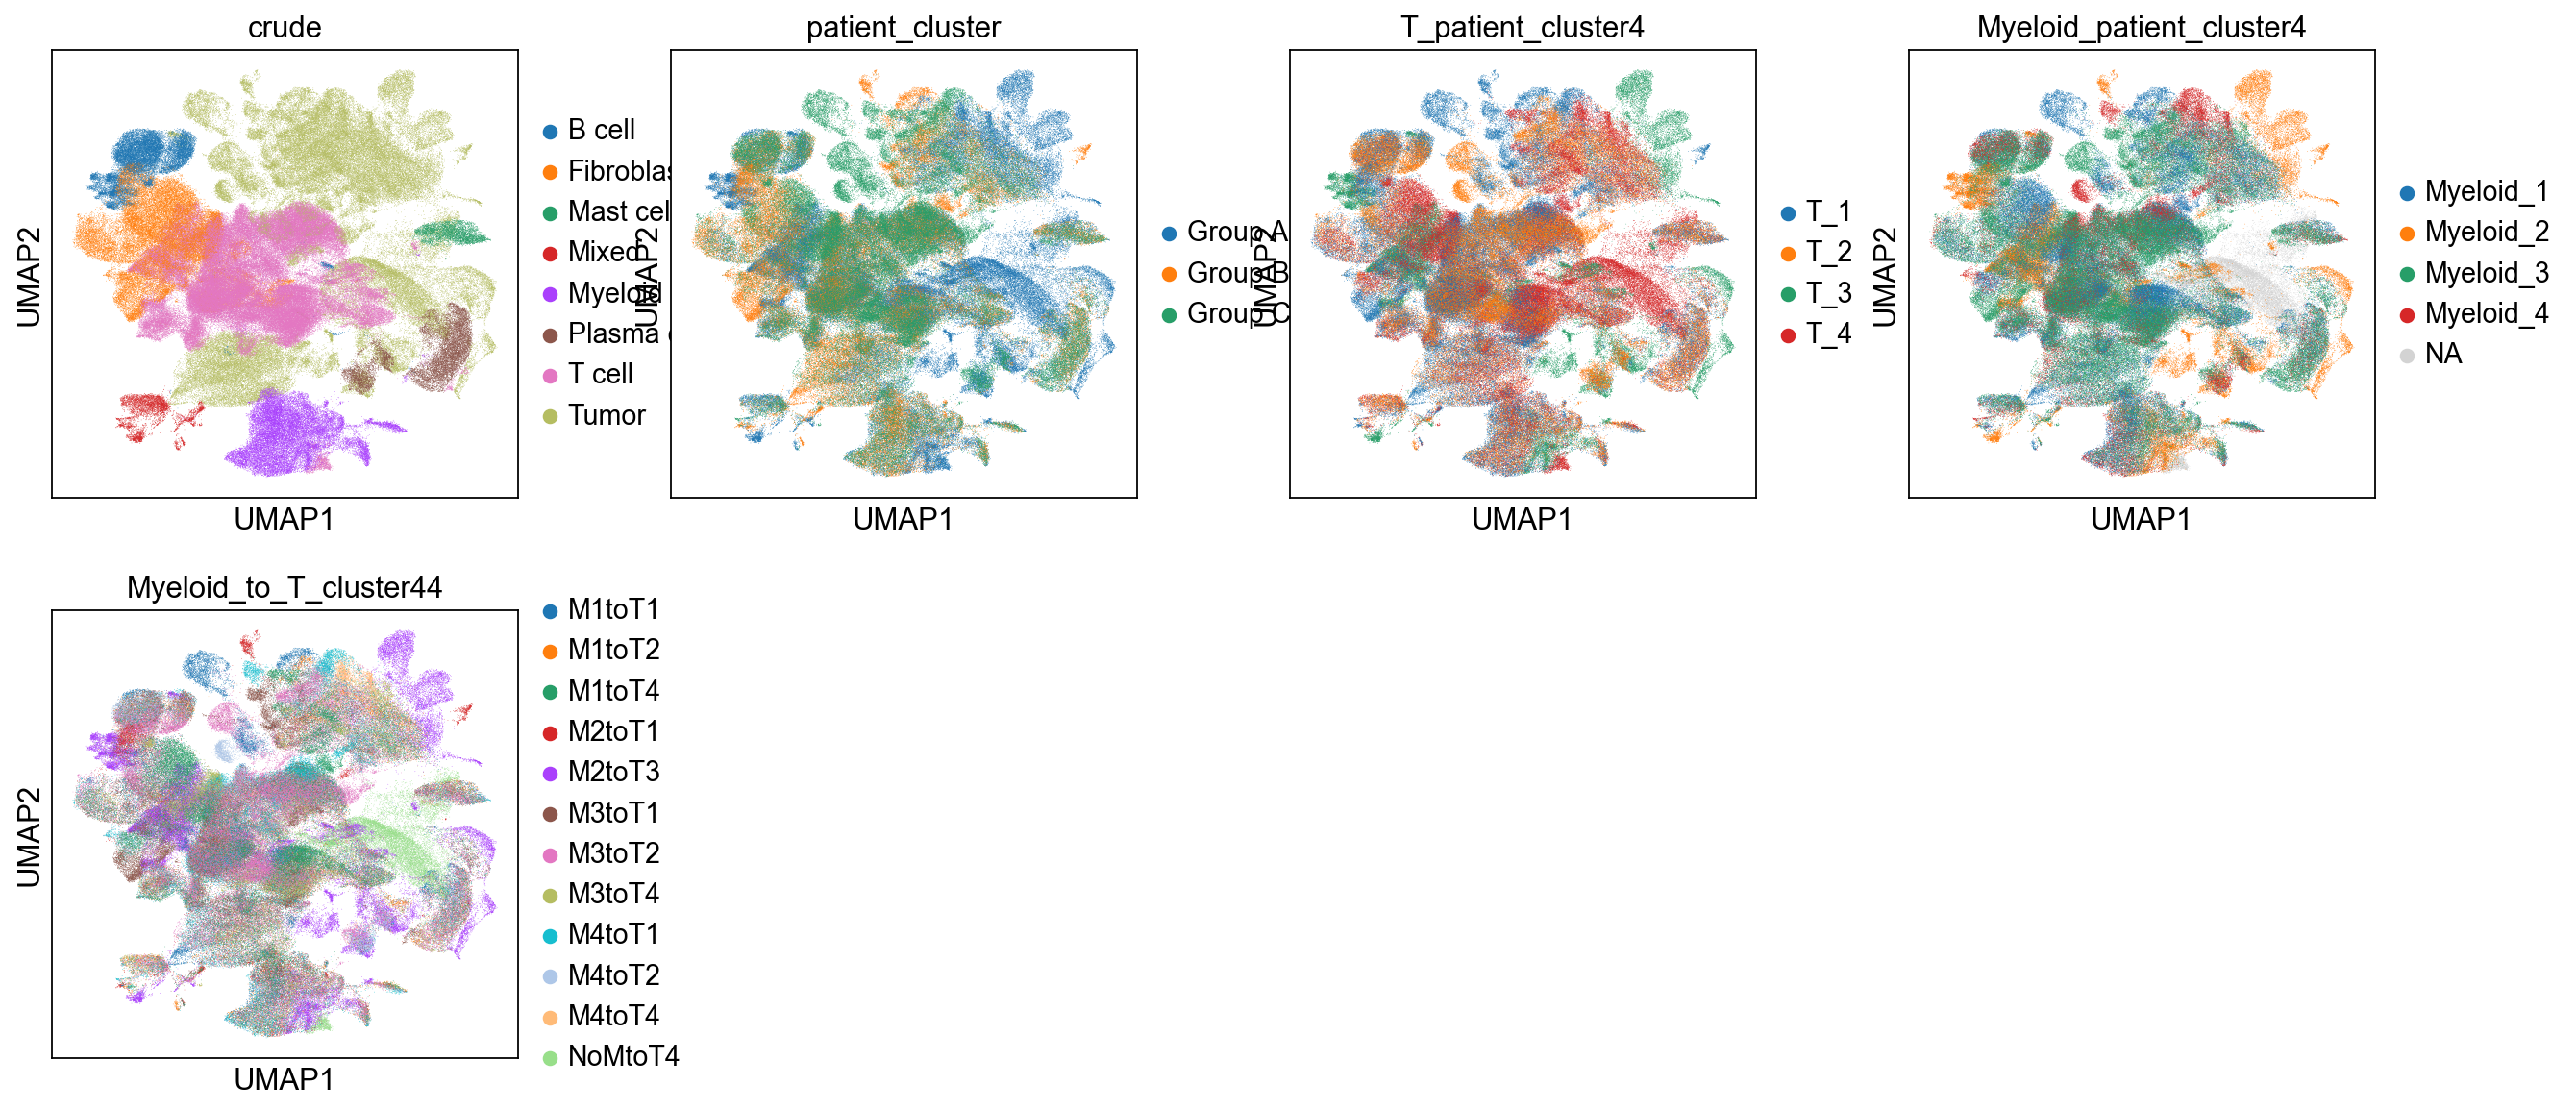

In [12]:
sc.pl.umap(adata, color=['crude','patient_cluster','T_patient_cluster4','Myeloid_patient_cluster4','Myeloid_to_T_cluster44'])

In [13]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:37)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:05:57)


In [14]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGCTAAACA-1-0-0-0-0-0   2747.0               2630   1283.869751   
AAACCTGAGCTGCAAG-1-0-0-0-0-0    696.0                664    821.045593   
AAACCTGAGTACGTAA-1-0-0-0-0-0    366.0                354    642.963806   
AAACCTGCACTGAAGG-1-0-0-0-0-0    720.0                699    956.075134   
AAACCTGGTGCACCAC-1-0-0-0-0-0   1406.0               1366    388.112122   
...                               ...                ...           ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2    1307.0               1269   1320.152710   
TTTGGTTTCACCTTAT-1-23-1-1-2    1216.0               1192   1467.112671   
TTTGGTTTCGCCGTGA-1-23-1-1-2    1420.0               1402   1545.445801   
TTTGGTTTCTCGCATC-1-23-1-1-2    1511.0               1476   1507.028442   
TTTGTCAAGTGTGAAT-1-23-1-1-2    1452.0               1412   1408.068970   

                              total_counts_mt  pct_counts_mt tissue patient  \
AAACCTGAGCTAAACA-1-0-0-0-0-0        19.201120       1.495566  tumor    P686   
AAACCTGAGCTGCAAG-1-0-0-0-0-0        22.309502       2.717206  tumor    P686   
AAACCTGAGTACGTAA-1-0-0-0-0-0        39.510632       6.145079  tumor    P686   
AAACCTGCACTGAAGG-1-0-0-0-0-0        19.870264       2.078316  tumor    P686   
AAACCTGGTGCACCAC-1-0-0-0-0-0         6.067459       1.563326  tumor    P686   
...                                       ...            ...    ...     ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2         30.058834       2.276921  tumor    P076   
TTTGGTTTCACCTTAT-1-23-1-1-2         23.589689       1.607899  tumor    P076   
TTTGGTTTCGCCGTGA-1-23-1-1-2         32.291584       2.089467  tumor    P076   
TTTGGTTTCTCGCATC-1-23-1-1-2         36.186527       2.401184  tumor    P076   
TTTGTCAAGTGTGAAT-1-23-1-1-2         31.153154       2.212474  tumor    P076   

                             leiden batch  total_counts_ribo  ...  \
AAACCTGAGCTAAACA-1-0-0-0-0-0      8     0         161.193115  ...   
AAACCTGAGCTGCAAG-1-0-0-0-0-0     16     0          97.282425  ...   
AAACCTGAGTACGTAA-1-0-0-0-0-0      8     0         109.494339  ...   
AAACCTGCACTGAAGG-1-0-0-0-0-0     33     0         186.630081  ...   
AAACCTGGTGCACCAC-1-0-0-0-0-0     19     0          75.051537  ...   
...                             ...   ...                ...  ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2       3     2         212.556946  ...   
TTTGGTTTCACCTTAT-1-23-1-1-2       0     2         166.493027  ...   
TTTGGTTTCGCCGTGA-1-23-1-1-2       1     2         171.050369  ...   
TTTGGTTTCTCGCATC-1-23-1-1-2       2     2         188.171768  ...   
TTTGTCAAGTGTGAAT-1-23-1-1-2       3     2         202.008438  ...   

                              GOBP_cellcycle_score  GOBP_histone_score  \
AAACCTGAGCTAAACA-1-0-0-0-0-0              0.026385           -0.045633   
AAACCTGAGCTGCAAG-1-0-0-0-0-0              0.019255           -0.034572   
AAACCTGAGTACGTAA-1-0-0-0-0-0              0.025115            0.036140   
AAACCTGCACTGAAGG-1-0-0-0-0-0             -0.013321           -0.050716   
AAACCTGGTGCACCAC-1-0-0-0-0-0             -0.010753           -0.027467   
...                                            ...                 ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2                    NaN                 NaN   
TTTGGTTTCACCTTAT-1-23-1-1-2                    NaN                 NaN   
TTTGGTTTCGCCGTGA-1-23-1-1-2                    NaN                 NaN   
TTTGGTTTCTCGCATC-1-23-1-1-2                    NaN                 NaN   
TTTGTCAAGTGTGAAT-1-23-1-1-2                    NaN                 NaN   

                              GOBP_pi3k_score    celltype       crude  \
AAACCTGAGCTAAACA-1-0-0-0-0-0         0.042776  Fibroblast  Fibroblast   
AAACCTGAGCTGCAAG-1-0-0-0-0-0        -0.058895       Tumor       Tumor   
AAACCTGAGTACGTAA-1-0-0-0-0-0         0.036661  Fibroblast  Fibroblast   
AAACCTGCACTGAAGG-1-0-0-0-0-0        -0.010067       Tumor       Tumor   
AAACCTGGTGCACCAC-1-0-0-0-0-0        -0.025247       Tumor       Tumor   
...                                 

In [15]:
# Patient groups from tumor cell analysis of 03-07-23
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = { 'Group A': ["P061",	"P094",	"P001",	"P080",	"P024",	"P036",	"P042",	"P082",	"P104",	"P056",	"P063",	"P009A",	"P866",	"P787",	"P986",	"P836",	"P658",	"P686",	"P944",	"P087",	"P039",	"P048",	"P038",	"P126",	"P585",	"P865",	"P846",	"P089",	"P107",	"P083",	"P074"
],
             'Group B': ["P010",	"P130",	"P015",	"P030",	"P049",	"P032",	"P037",	"P017",	"P020",	"P023",	"P019",	"P021",	"P011",	"P084",	"P091",	"P009B",	"P075",	"P057",	"P065",	"P008",	"P008"
],
             'Group C': ["P028",	"P052",	"P012",	"P027",	"P026",	"P128",	"P031",	"P054",	"P062",	"P127",	"P079",	"P076",	"P002",	"P016",	"P040",	"P047",	"P022",	"P044"
]}

# Initialize empty column in cell metadata
adata.obs['patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'patient_cluster'] = i

#sc.pl.pca(adata, color=['patient_cluster_modified'], legend_loc='right margin', legend_fontsize=6)

In [16]:
adata.write('epi_immn_concatenated_06-06-23.h5ad', compression='gzip')

In [5]:
adata = sc.read('epi_immn_concatenated_06-06-23.h5ad')

In [18]:
df1 = pd.crosstab(adata.obs['patient'],adata.obs['T_patient_cluster4'])
df1

T_patient_cluster4   T_1   T_2   T_3    T_4
patient                                    
P001                3480     0     0      0
P002                   0  7721     0      0
P008                7206     0     0      0
P009A                  0     0     0  16391
P009B                  0     0     0   8098
...                  ...   ...   ...    ...
P846                   0     0  8179      0
P865                   0     0  4278      0
P866                   0     0  7274      0
P944                   0     0  2056      0
P986                   0     0  2652      0

[69 rows x 4 columns]

In [19]:
df2 = pd.crosstab(adata.obs['patient'],adata.obs['Myeloid_patient_cluster4'])
df2

Myeloid_patient_cluster4  Myeloid_1  Myeloid_2  Myeloid_3  Myeloid_4
patient                                                             
P001                              0          0       3480          0
P002                              0          0       7721          0
P008                              0          0       7206          0
P009B                          8098          0          0          0
P010                              0       6710          0          0
...                             ...        ...        ...        ...
P846                              0       8179          0          0
P865                              0       4278          0          0
P866                              0       7274          0          0
P944                              0       2056          0          0
P986                              0       2652          0          0

[68 rows x 4 columns]

In [20]:
df3 = pd.crosstab(adata.obs['patient'],adata.obs['Myeloid_to_T_cluster44'])
df3

Myeloid_to_T_cluster44  M1toT1  M1toT2  M1toT4  M2toT1  M2toT3  M3toT1  \
patient                                                                  
P001                         0       0       0       0       0    3480   
P002                         0       0       0       0       0       0   
P008                         0       0       0       0       0    7206   
P009A                        0       0       0       0       0       0   
P009B                        0       0    8098       0       0       0   
...                        ...     ...     ...     ...     ...     ...   
P846                         0       0       0       0    8179       0   
P865                         0       0       0       0    4278       0   
P866                         0       0       0       0    7274       0   
P944                         0       0       0       0    2056       0   
P986                         0       0       0       0    2652       0   

Myeloid_to_T_cluster44  M3toT2  M3toT4  M4toT1  M4toT2  M4toT4  NoMtoT4  
patient                                                                  
P001                         0       0       0       0       0        0  
P002                      7721       0       0       0       0        0  
P008                         0       0       0       0       0        0  
P009A                        0       0       0       0       0    16391  
P009B                        0       0       0       0       0        0  
...                        ...     ...     ...     ...     ...      ...  
P846                         0       0       0       0       0        0  
P865                         0       0       0       0       0        0  
P866                         0       0       0       0       0        0  
P944                         0       0       0       0       0        0  
P986                         0       0       0       0       0        0  

[69 rows x 12 columns]

In [21]:
df4= pd.crosstab(adata.obs['patient'],adata.obs['patient_cluster'])

In [22]:
df5 = pd.concat([df1, df2, df3,df4], axis=1, ignore_index=False)
df5

T_1   T_2   T_3    T_4  Myeloid_1  Myeloid_2  Myeloid_3  Myeloid_4  \
patient                                                                        
P001     3480     0     0      0        0.0        0.0     3480.0        0.0   
P002        0  7721     0      0        0.0        0.0     7721.0        0.0   
P008     7206     0     0      0        0.0        0.0     7206.0        0.0   
P009A       0     0     0  16391        NaN        NaN        NaN        NaN   
P009B       0     0     0   8098     8098.0        0.0        0.0        0.0   
...       ...   ...   ...    ...        ...        ...        ...        ...   
P846        0     0  8179      0        0.0     8179.0        0.0        0.0   
P865        0     0  4278      0        0.0     4278.0        0.0        0.0   
P866        0     0  7274      0        0.0     7274.0        0.0        0.0   
P944        0     0  2056      0        0.0     2056.0        0.0        0.0   
P986        0     0  2652      0        0.0     2652.0        0.0        0.0   

         M1toT1  M1toT2  ...  M3toT1  M3toT2  M3toT4  M4toT1  M4toT2  M4toT4  \
patient                  ...                                                   
P001          0       0  ...    3480       0       0       0       0       0   
P002          0       0  ...       0    7721       0       0       0       0   
P008          0       0  ...    7206       0       0       0       0       0   
P009A         0       0  ...       0       0       0       0       0       0   
P009B         0       0  ...       0       0       0       0       0       0   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
P846          0       0  ...       0       0       0       0       0       0   
P865          0       0  ...       0       0       0       0       0       0   
P866          0       0  ...       0       0       0       0       0       0   
P944          0       0  ...       0       0       0       0       0       0   
P986          0       0  ...       0       0       0       0       0       0   

         NoMtoT4  Group A  Group B  Group C  
patient                                      
P001           0     3480        0        0  
P002           0        0        0     7721  
P008           0        0     7206        0  
P009A      16391    16391        0        0  
P009B          0        0     8098        0  
...          ...      ...      ...      ...  
P846           0     8179        0        0  
P865           0     4278        0        0  
P866           0     7274        0        0  
P944           0     2056        0        0  
P986           0     2652        0        0  

[69 rows x 23 columns]

In [23]:
df5.to_csv('patient_T_M_MT_tumor_class.csv')

In [24]:
#adata_EM = adata[adata.obs['crude'].isin(['epithelial','Myeloid cell'])]

In [25]:
#adata_M = adata[adata.obs['crude'].isin(['Myeloid cell'])]

In [26]:
#adata_T = adata[adata.obs['crude'].isin(['T cell'])]

In [27]:
## louvain tool again required

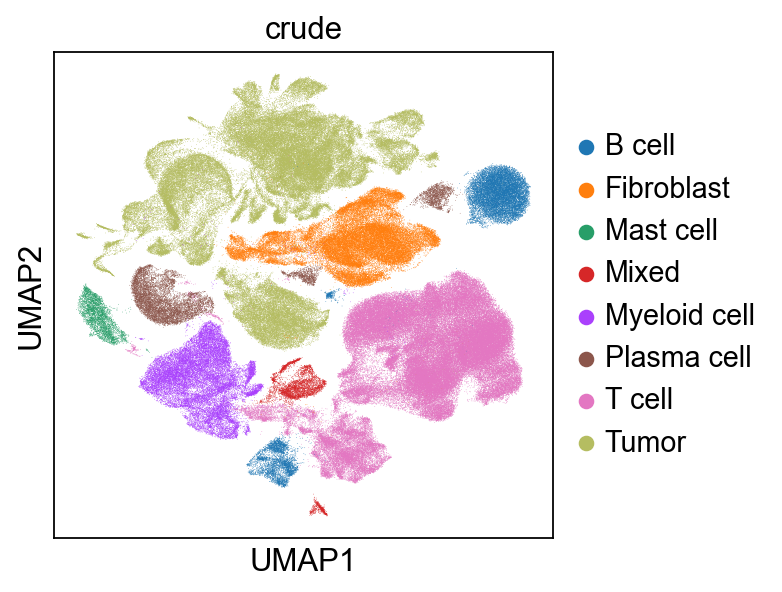

In [28]:
sc.pl.umap(adata, color=['crude'])#, save='epi_and_immn_cells.pdf')

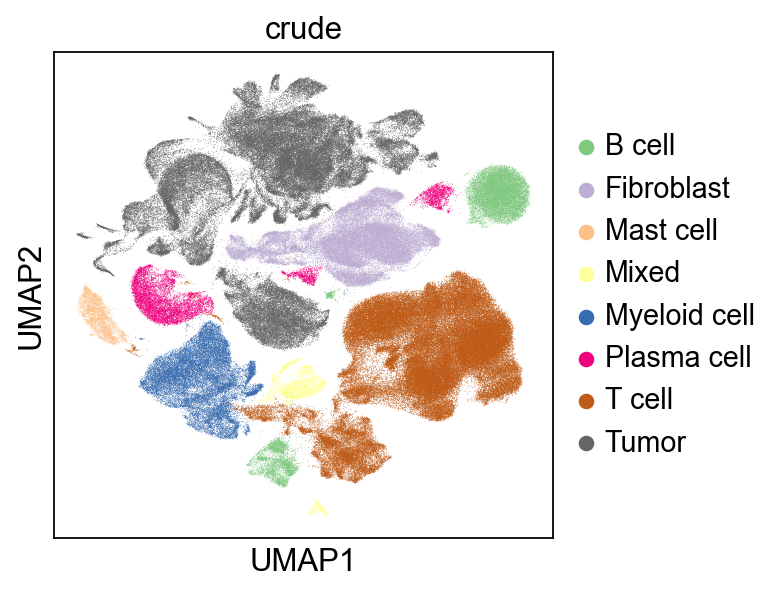

In [29]:
sc.pl.umap(adata, color=['crude'],
           palette="Accent")#, save='epi_and_immn_cells.pdf')

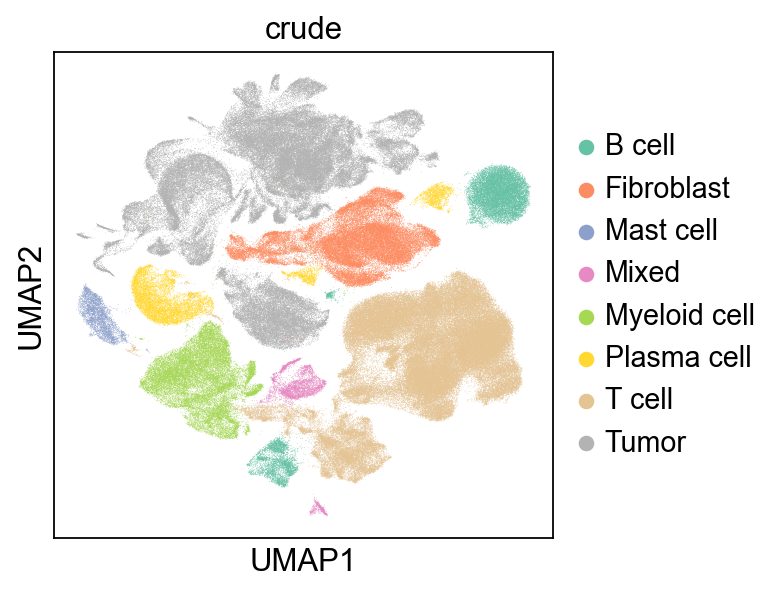

In [30]:
sc.pl.umap(adata, color=['crude'],
           palette="Set2")#, save='epi_and_immn_cells.pdf')

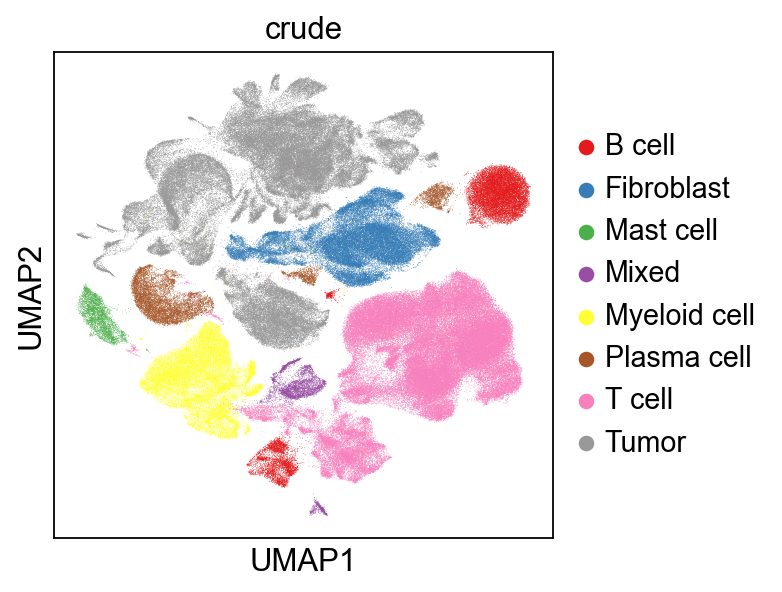

In [36]:
sc.pl.umap(adata, color=['crude'],
           palette="Set1")#, save='tumor_fibro_and_immn_cells.pdf')

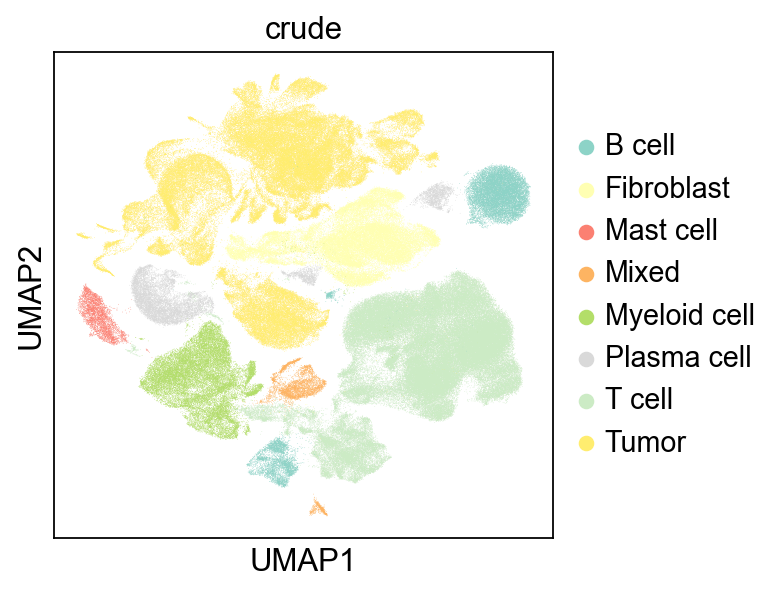

In [32]:
sc.pl.umap(adata, color=['crude'],
           palette="Set3")#, save='epi_and_immn_cells.pdf')

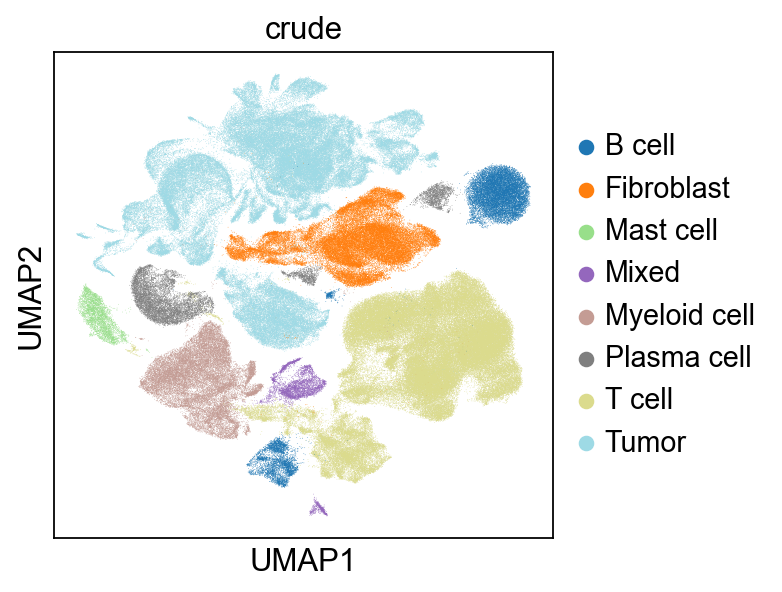

In [33]:
sc.pl.umap(adata, color=['crude'],
           palette="tab20")#, save='epi_and_immn_cells.pdf')

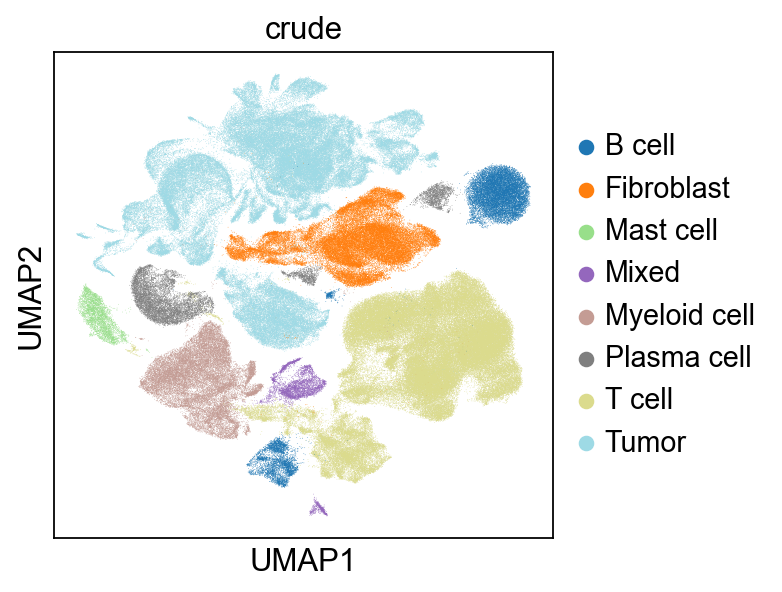

In [35]:
sc.pl.umap(adata, color=['crude'],cmap='tab20')

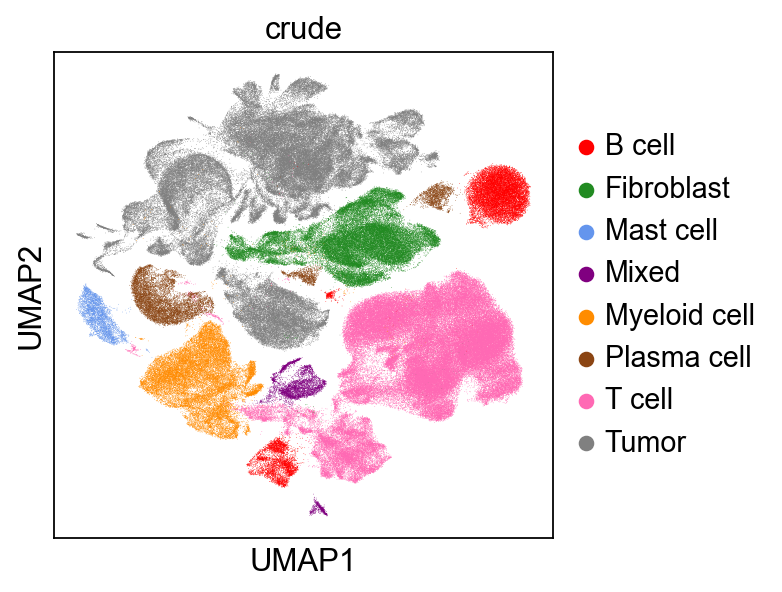

In [37]:
sc.pl.umap(adata, color=['crude'],
          palette={
        "B cell": "red",
        "Mast cell": "cornflowerblue",
        "Mixed": "purple",
        "Myeloid cell": "darkorange",
              "Plasma cell":"saddlebrown",
              "T cell":"hotpink",
              "Fibroblast": "forestgreen",
              "Tumor":"gray"
    } , save='tumor_fibro_and_immn_cells_1.pdf')

In [38]:
sc.pl.umap(adata_immn, color=['crude'], 
           palette={"B cell": "red",
        "Mast cell": "cornflowerblue",
        "Mixed": "purple",
        "Myeloid cell": "darkorange",
              "Plasma cell":"saddlebrown",
              "T cell":"hotpink"},
          save='_immn_cells_by_crude_1.pdf')

NameError: name 'adata_immn' is not defined

In [39]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGCTAAACA-1-0-0-0-0-0   2747.0               2630   1283.869751   
AAACCTGAGCTGCAAG-1-0-0-0-0-0    696.0                664    821.045593   
AAACCTGAGTACGTAA-1-0-0-0-0-0    366.0                354    642.963806   
AAACCTGCACTGAAGG-1-0-0-0-0-0    720.0                699    956.075134   
AAACCTGGTGCACCAC-1-0-0-0-0-0   1406.0               1366    388.112122   
...                               ...                ...           ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2    1307.0               1269   1320.152710   
TTTGGTTTCACCTTAT-1-23-1-1-2    1216.0               1192   1467.112671   
TTTGGTTTCGCCGTGA-1-23-1-1-2    1420.0               1402   1545.445801   
TTTGGTTTCTCGCATC-1-23-1-1-2    1511.0               1476   1507.028442   
TTTGTCAAGTGTGAAT-1-23-1-1-2    1452.0               1412   1408.068970   

                              total_counts_mt  pct_counts_mt tissue patient  \
AAACCTGAGCTAAACA-1-0-0-0-0-0        19.201120       1.495566  tumor    P686   
AAACCTGAGCTGCAAG-1-0-0-0-0-0        22.309502       2.717206  tumor    P686   
AAACCTGAGTACGTAA-1-0-0-0-0-0        39.510632       6.145079  tumor    P686   
AAACCTGCACTGAAGG-1-0-0-0-0-0        19.870264       2.078316  tumor    P686   
AAACCTGGTGCACCAC-1-0-0-0-0-0         6.067459       1.563326  tumor    P686   
...                                       ...            ...    ...     ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2         30.058834       2.276921  tumor    P076   
TTTGGTTTCACCTTAT-1-23-1-1-2         23.589689       1.607899  tumor    P076   
TTTGGTTTCGCCGTGA-1-23-1-1-2         32.291584       2.089467  tumor    P076   
TTTGGTTTCTCGCATC-1-23-1-1-2         36.186527       2.401184  tumor    P076   
TTTGTCAAGTGTGAAT-1-23-1-1-2         31.153154       2.212474  tumor    P076   

                             leiden batch  total_counts_ribo  ...  \
AAACCTGAGCTAAACA-1-0-0-0-0-0      8     0         161.193115  ...   
AAACCTGAGCTGCAAG-1-0-0-0-0-0     16     0          97.282425  ...   
AAACCTGAGTACGTAA-1-0-0-0-0-0      8     0         109.494339  ...   
AAACCTGCACTGAAGG-1-0-0-0-0-0     33     0         186.630081  ...   
AAACCTGGTGCACCAC-1-0-0-0-0-0     19     0          75.051537  ...   
...                             ...   ...                ...  ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2       3     2         212.556946  ...   
TTTGGTTTCACCTTAT-1-23-1-1-2       0     2         166.493027  ...   
TTTGGTTTCGCCGTGA-1-23-1-1-2       1     2         171.050369  ...   
TTTGGTTTCTCGCATC-1-23-1-1-2       2     2         188.171768  ...   
TTTGTCAAGTGTGAAT-1-23-1-1-2       3     2         202.008438  ...   

                              GOBP_cellcycle_score  GOBP_histone_score  \
AAACCTGAGCTAAACA-1-0-0-0-0-0              0.026385           -0.045633   
AAACCTGAGCTGCAAG-1-0-0-0-0-0              0.019255           -0.034572   
AAACCTGAGTACGTAA-1-0-0-0-0-0              0.025115            0.036140   
AAACCTGCACTGAAGG-1-0-0-0-0-0             -0.013321           -0.050716   
AAACCTGGTGCACCAC-1-0-0-0-0-0             -0.010753           -0.027467   
...                                            ...                 ...   
TTTGGTTGTTGGTGGA-1-23-1-1-2                    NaN                 NaN   
TTTGGTTTCACCTTAT-1-23-1-1-2                    NaN                 NaN   
TTTGGTTTCGCCGTGA-1-23-1-1-2                    NaN                 NaN   
TTTGGTTTCTCGCATC-1-23-1-1-2                    NaN                 NaN   
TTTGTCAAGTGTGAAT-1-23-1-1-2                    NaN                 NaN   

                              GOBP_pi3k_score    celltype       crude  \
AAACCTGAGCTAAACA-1-0-0-0-0-0         0.042776  Fibroblast  Fibroblast   
AAACCTGAGCTGCAAG-1-0-0-0-0-0        -0.058895       Tumor       Tumor   
AAACCTGAGTACGTAA-1-0-0-0-0-0         0.036661  Fibroblast  Fibroblast   
AAACCTGCACTGAAGG-1-0-0-0-0-0        -0.010067       Tumor       Tumor   
AAACCTGGTGCACCAC-1-0-0-0-0-0        -0.025247       Tumor       Tumor   
...                                 

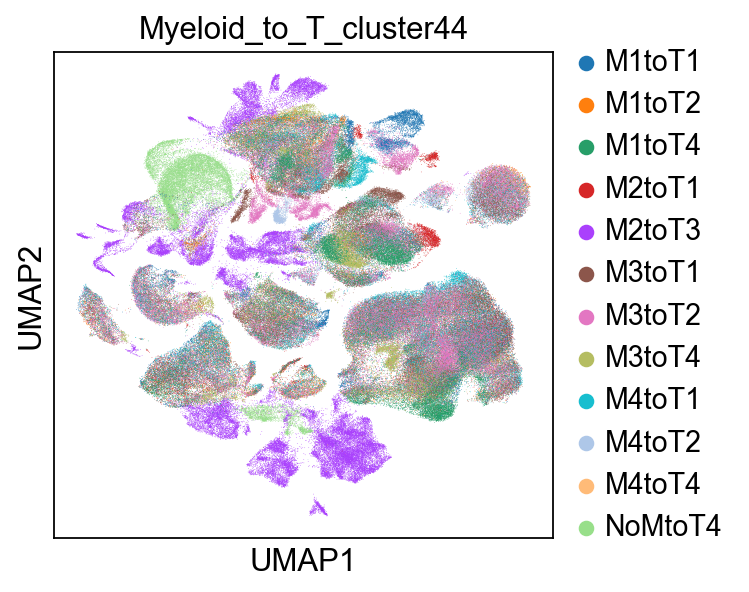

In [40]:
sc.pl.umap(adata, color=['Myeloid_to_T_cluster44'], 
          
          save='_epi_immn_cells_by_MT_class.pdf')

In [ ]:
sc.pl.umap(adata_immn, color=['Myeloid_to_T_cluster44'], 
          
          save='_immn_cells_by_MT_class.pdf')

In [ ]:
adata_immn

In [41]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Set1')

rgba = cmap(0.1)
print(rgba)

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0)


In [42]:
df_1 = pd.crosstab(adata.obs['patient'], adata.obs['Myeloid_to_T_cluster44'])
df_1

Myeloid_to_T_cluster44  M1toT1  M1toT2  M1toT4  M2toT1  M2toT3  M3toT1  \
patient                                                                  
P001                         0       0       0       0       0    3480   
P002                         0       0       0       0       0       0   
P008                         0       0       0       0       0    7206   
P009A                        0       0       0       0       0       0   
P009B                        0       0    8098       0       0       0   
...                        ...     ...     ...     ...     ...     ...   
P846                         0       0       0       0    8179       0   
P865                         0       0       0       0    4278       0   
P866                         0       0       0       0    7274       0   
P944                         0       0       0       0    2056       0   
P986                         0       0       0       0    2652       0   

Myeloid_to_T_cluster44  M3toT2  M3toT4  M4toT1  M4toT2  M4toT4  NoMtoT4  
patient                                                                  
P001                         0       0       0       0       0        0  
P002                      7721       0       0       0       0        0  
P008                         0       0       0       0       0        0  
P009A                        0       0       0       0       0    16391  
P009B                        0       0       0       0       0        0  
...                        ...     ...     ...     ...     ...      ...  
P846                         0       0       0       0       0        0  
P865                         0       0       0       0       0        0  
P866                         0       0       0       0       0        0  
P944                         0       0       0       0       0        0  
P986                         0       0       0       0       0        0  

[69 rows x 12 columns]

# TME isolation

In [6]:
adata.obs['crude']

AAACCTGAGCTAAACA-1-0-0-0-0-0    Fibroblast
AAACCTGAGCTGCAAG-1-0-0-0-0-0         Tumor
AAACCTGAGTACGTAA-1-0-0-0-0-0    Fibroblast
AAACCTGCACTGAAGG-1-0-0-0-0-0         Tumor
AAACCTGGTGCACCAC-1-0-0-0-0-0         Tumor
                                   ...    
TTTGGTTGTTGGTGGA-1-23-1-1-2         B cell
TTTGGTTTCACCTTAT-1-23-1-1-2         T cell
TTTGGTTTCGCCGTGA-1-23-1-1-2         T cell
TTTGGTTTCTCGCATC-1-23-1-1-2         T cell
TTTGTCAAGTGTGAAT-1-23-1-1-2         B cell
Name: crude, Length: 316153, dtype: category
Categories (8, object): ['B cell', 'Fibroblast', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell', 'Tumor']

In [7]:
adata_tme = adata[adata.obs['crude'].isin(['B cell','Fibroblast','Mast cell','Mixed','Myeloid cell','Plasma cell','T cell'])]
adata_tme

View of AnnData object with n_obs × n_vars = 215831 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 'pct_dropout_

In [8]:
sc.pp.neighbors(adata_tme, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata_tme)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:55)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:43)


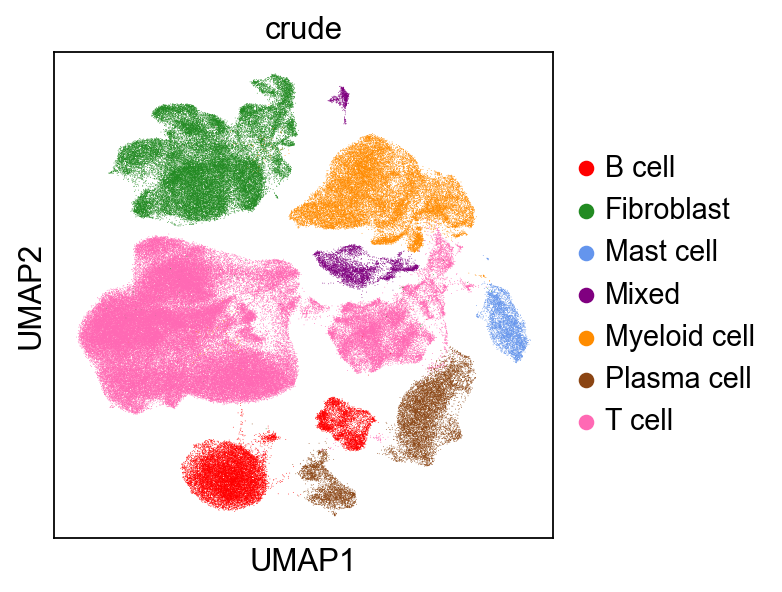

In [9]:
sc.pl.umap(adata_tme, color=['crude'],
          palette={
        "B cell": "red",
        "Mast cell": "cornflowerblue",
        "Mixed": "purple",
        "Myeloid cell": "darkorange",
              "Plasma cell":"saddlebrown",
              "T cell":"hotpink",
              "Fibroblast": "forestgreen"
              
    } , save='_fibro_and_immn_cells_1.pdf')

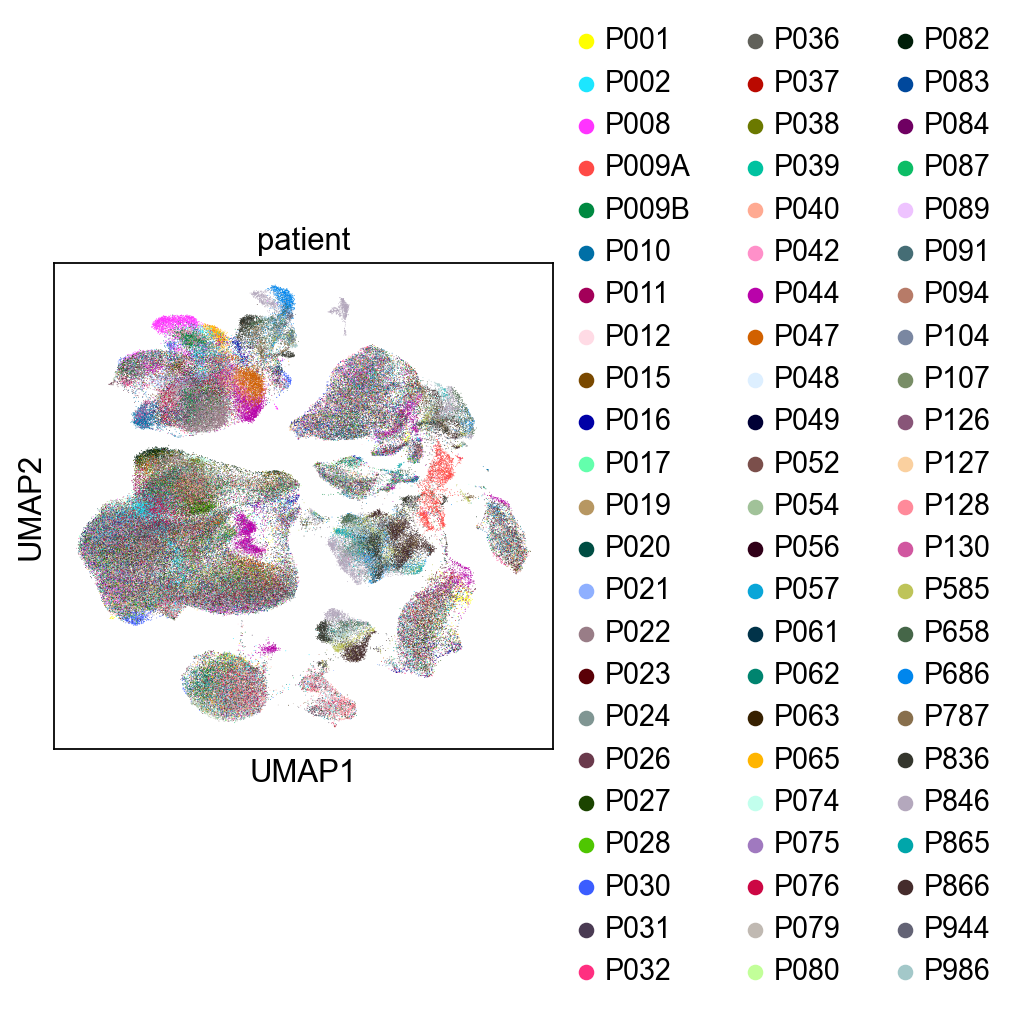

In [11]:
sc.pl.umap(adata_tme, color=['patient'], save='_TME_by_patient.pdf')